In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from numpy.lib import scimath
%matplotlib inline

In [4]:
def rf(t,y,*args):
    """rf ode"""
    c1 = y[0]
    c0 = y[1]
    cm1 = y[2]
    s = 1j*sigma/np.sqrt(2) 
    #now define equations
    f0 = s * c0 * np.exp(-1j*dm*t)
    f1 = s*cm1*np.exp(-1j*dp*t)+s*c1*np.exp(1j*dm*t)
    f2 = s*c0*np.exp(1j*dp*t)
    return [f0,f1,f2]   

In [13]:
sigma = 10
dm = 1
dp = dm

y0 = [np.complex(1,0),np.complex(0,0),np.complex(0,0)]
r = ode(rf).set_integrator('zvode')
r.set_initial_value(y0,0)
dt = 1e-3
tfinal = 2*np.pi / sigma
t = np.linspace(0,tfinal, tfinal/dt+1) 
ans = np.zeros((len(t),3),dtype = complex)
step  = 0
while r.successful() and r.t < tfinal:
    ans[step] = np.asarray(r.integrate(r.t + dt))
    step += 1

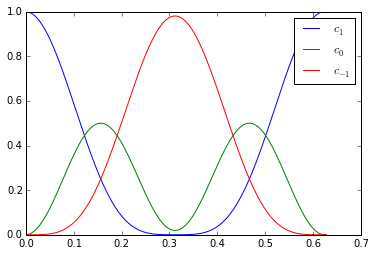

In [14]:
toplot = (np.conj(ans) * ans).real

plt.plot(t,toplot[:,0], label = r'$c_1$')
plt.plot(t,toplot[:,1], label = r'$c_0$')
plt.plot(t,toplot[:,2], label = r'$c_{-1}$')
plt.legend()